In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

In [4]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

# 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [6]:
wego['ADJUSTED_ONTIME_COUNT'].value_counts(normalize=True)

ADJUSTED_ONTIME_COUNT
1    0.770841
0    0.229159
Name: proportion, dtype: float64

In [7]:
wego['ADJUSTED_ONTIME_COUNT'].isnull().sum()

0

C:\Users\Owne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


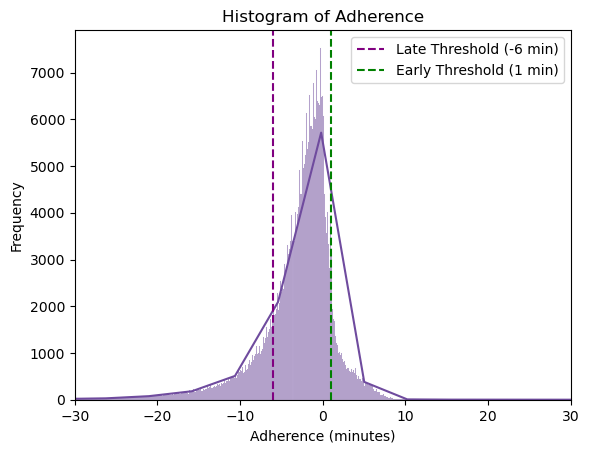

In [8]:
sns.histplot(wego['ADHERENCE'], kde=True, color='#6F4B9E')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

In [9]:
wego['HDWY_DEV_PERCENT'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']

C:\Users\Owne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-1.5, 2.0)

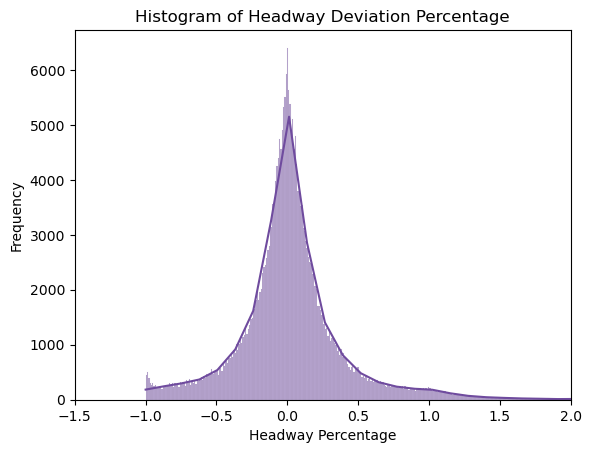

In [10]:
sns.histplot(wego['HDWY_DEV_PERCENT'], kde=True, color='#6F4B9E')
plt.title('Histogram of Headway Deviation Percentage')
plt.xlabel('Headway Percentage')
plt.ylabel('Frequency')
plt.xlim(left=-1.5, right=2)

The overall on time performance is around 77%. See histograms for overall distribution of adherance and headway deviation.

# 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [11]:
(
    wego
    .loc[wego['SCHEDULED_HDWY']==0]
    [['ROUTE_ABBR', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
     'SCHEDULED_TIME', 'SCHEDULED_HDWY', 'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY',
     'HDWY_DEV', 'HDWY_DEV_PERCENT']]
)

,ROUTE_ABBR,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,HDWY_DEV_PERCENT
42265,50,2023-08-08,351236,MLKS,TO DOWNTOWN,1,2023-08-08 15:10:00,0.0,2023-08-08 15:11:58,NaN,NaN,NaN
46637,55,2023-08-08,353988,ARTS,TO DOWNTOWN,1,2023-08-08 15:12:00,0.0,2023-08-08 15:14:13,11.416666,11.416666,inf
46643,56,2023-08-08,354106,MEIG,TO DOWNTOWN,1,2023-08-08 15:20:00,0.0,2023-08-08 15:23:34,0.650000,0.650000,inf
48742,50,2023-08-09,351236,MLKS,TO DOWNTOWN,1,2023-08-09 15:10:00,0.0,2023-08-09 15:11:32,6.983333,6.983333,inf
48756,56,2023-08-09,351239,MEIG,TO DOWNTOWN,1,2023-08-09 15:20:00,0.0,2023-08-09 15:20:20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
339622,55,2023-09-28,353988,ARTS,TO DOWNTOWN,1,2023-09-28 15:12:00,0.0,2023-09-28 15:14:54,NaN,NaN,NaN
339628,56,2023-09-28,354106,MEIG,TO DOWNTOWN,1,2023-09-28 15:20:00,0.0,2023-09-28 15:22:34,2.283333,2.283333,inf
341727,50,2023-09-29,351236,MLKS,TO DOWNTOWN,1,2023-09-29 15:10:00,0.0,2023-09-29 15:17:54,8.850000,8.850000,inf
346163,55,2023-09-29,353988,ARTS,TO DOWNTOWN,1,2023-09-29 15:12:00,0.0,2023-09-29 15:14:34,0.150000,0.150000,inf


In [12]:
wego_clean = wego[wego.SCHEDULED_HDWY != 0.0]

In [13]:
wego_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENT
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,0.175556
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,0.062222
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,0.583333


In [70]:
question_2 = (
    wego_clean
    .loc[wego_clean['SCHEDULED_HDWY']>0]
    [['ROUTE_ABBR', 'ADJUSTED_ONTIME_COUNT', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
     'SCHEDULED_TIME', 'SCHEDULED_HDWY', 'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY',
     'HDWY_DEV', 'HDWY_DEV_PERCENT']]
)

In [71]:
question_2

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,HDWY_DEV_PERCENT
7,22,1,2023-08-01,345106,MHSP,TO DOWNTOWN,1,2023-08-01 05:42:00,35.0,2023-08-01 05:43:43,37.666666,2.666666,0.076190
8,22,1,2023-08-01,345106,ELIZ,TO DOWNTOWN,0,2023-08-01 05:46:00,35.0,2023-08-01 05:47:55,36.966666,1.966666,0.056190
9,22,1,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334,-0.032222
11,22,1,2023-08-01,345107,MCC5_10,FROM DOWNTOWN,1,2023-08-01 06:15:00,15.0,2023-08-01 06:16:19,12.833333,-2.166667,-0.144444
12,22,0,2023-08-01,345107,CV23,FROM DOWNTOWN,0,2023-08-01 06:25:00,15.0,2023-08-01 06:23:30,11.116666,-3.883334,-0.258889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350321,7,0,2023-09-30,353447,21BK,FROM DOWNTOWN,0,2023-09-30 21:59:00,30.0,NaN,NaN,NaN,NaN
350323,7,0,2023-09-30,353448,HBHS,TO DOWNTOWN,1,2023-09-30 22:16:00,30.0,2023-09-30 22:24:37,34.916666,4.916666,0.163889
350324,7,0,2023-09-30,353448,21BK,TO DOWNTOWN,0,2023-09-30 22:23:00,30.0,2023-09-30 22:31:26,35.266666,5.266666,0.175556
350326,7,1,2023-09-30,353449,MCC5_9,FROM DOWNTOWN,1,2023-09-30 22:45:00,30.0,2023-09-30 22:49:19,31.866666,1.866666,0.062222


In [72]:
from_downtown = question_2.loc[question_2['ROUTE_DIRECTION_NAME'].isin(['FROM DOWNTOWN'])]
from_downtown

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,HDWY_DEV_PERCENT
11,22,1,2023-08-01,345107,MCC5_10,FROM DOWNTOWN,1,2023-08-01 06:15:00,15.0,2023-08-01 06:16:19,12.833333,-2.166667,-0.144444
12,22,0,2023-08-01,345107,CV23,FROM DOWNTOWN,0,2023-08-01 06:25:00,15.0,2023-08-01 06:23:30,11.116666,-3.883334,-0.258889
18,22,1,2023-08-01,345109,MCC5_10,FROM DOWNTOWN,1,2023-08-01 07:15:00,15.0,2023-08-01 07:16:44,15.233333,0.233333,0.015556
19,22,1,2023-08-01,345109,CV23,FROM DOWNTOWN,0,2023-08-01 07:25:00,15.0,2023-08-01 07:24:02,14.616666,-0.383334,-0.025556
25,22,1,2023-08-01,345111,MCC5_10,FROM DOWNTOWN,1,2023-08-01 08:15:00,15.0,2023-08-01 08:18:01,14.833333,-0.166667,-0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350315,7,1,2023-09-30,353445,21BK,FROM DOWNTOWN,0,2023-09-30 20:59:00,28.0,2023-09-30 21:02:20,30.316666,2.316666,0.082738
350320,7,1,2023-09-30,353447,MCC5_9,FROM DOWNTOWN,1,2023-09-30 21:45:00,30.0,2023-09-30 21:50:54,36.716666,6.716666,0.223889
350321,7,0,2023-09-30,353447,21BK,FROM DOWNTOWN,0,2023-09-30 21:59:00,30.0,NaN,NaN,NaN,NaN
350326,7,1,2023-09-30,353449,MCC5_9,FROM DOWNTOWN,1,2023-09-30 22:45:00,30.0,2023-09-30 22:49:19,31.866666,1.866666,0.062222


In [73]:
to_downtown = question_2.loc[question_2['ROUTE_DIRECTION_NAME'].isin(['TO DOWNTOWN'])]
to_downtown

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,HDWY_DEV_PERCENT
7,22,1,2023-08-01,345106,MHSP,TO DOWNTOWN,1,2023-08-01 05:42:00,35.0,2023-08-01 05:43:43,37.666666,2.666666,0.076190
8,22,1,2023-08-01,345106,ELIZ,TO DOWNTOWN,0,2023-08-01 05:46:00,35.0,2023-08-01 05:47:55,36.966666,1.966666,0.056190
9,22,1,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334,-0.032222
14,22,1,2023-08-01,345108,MHSP,TO DOWNTOWN,1,2023-08-01 06:42:00,60.0,2023-08-01 06:43:31,59.800000,-0.200000,-0.003333
15,22,1,2023-08-01,345108,ELIZ,TO DOWNTOWN,0,2023-08-01 06:46:00,60.0,2023-08-01 06:48:00,60.083333,0.083333,0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,7,0,2023-09-30,353444,21BK,TO DOWNTOWN,0,2023-09-30 20:18:00,30.0,2023-09-30 20:24:13,35.516666,5.516666,0.183889
350317,7,1,2023-09-30,353446,HBHS,TO DOWNTOWN,1,2023-09-30 21:16:00,28.0,2023-09-30 21:16:51,26.066666,-1.933334,-0.069048
350318,7,0,2023-09-30,353446,21BK,TO DOWNTOWN,0,2023-09-30 21:23:00,28.0,2023-09-30 21:30:00,31.566666,3.566666,0.127381
350323,7,0,2023-09-30,353448,HBHS,TO DOWNTOWN,1,2023-09-30 22:16:00,30.0,2023-09-30 22:24:37,34.916666,4.916666,0.163889


In [74]:
from_downtown['HDWY_DEV_PERCENT'].apply(['min','max','mean','median'])

min       -1.000000
max       24.175000
mean       0.036886
median     0.001803
Name: HDWY_DEV_PERCENT, dtype: float64

In [75]:
to_downtown['HDWY_DEV_PERCENT'].apply(['min','max','mean','median'])

min       -1.000000
max       21.753333
mean       0.025648
median     0.001709
Name: HDWY_DEV_PERCENT, dtype: float64

In [76]:
route_counts = wego['ROUTE_ABBR'].value_counts()
route_counts

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

In [77]:
ontime_route = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1, 'ROUTE_ABBR'].value_counts()
ontime_route

ROUTE_ABBR
56    48361
55    42080
52    37736
50    36309
23    35137
3     34516
22    22492
7     13417
Name: count, dtype: int64

In [78]:
ontime_route_percent = ontime_route/route_counts
ontime_route_percent.sort_values(ascending=False) # shows highest route on time percetage

ROUTE_ABBR
22    0.866443
50    0.838719
23    0.834450
56    0.805748
7     0.744314
3     0.731860
52    0.728227
55    0.679323
Name: count, dtype: float64

In [79]:
location_counts = wego['TIME_POINT_ABBR'].value_counts()
location_counts

TIME_POINT_ABBR
GXRVRGAT    14954
DWMRT       14085
WHBG        11602
MXTHOMP     10384
MXWHARF     10382
            ...  
HEAD           73
MCC4_13        72
MCC5_12        43
MCC5_7         36
CRES           36
Name: count, Length: 61, dtype: int64

In [80]:
wego[['TIME_POINT_ABBR', 'LATITUDE', 'LONGITUDE']]

,TIME_POINT_ABBR,LATITUDE,LONGITUDE
0,MHSP,36.181248,-86.847705
1,ELIZ,36.193454,-86.839981
2,CV23,36.182177,-86.814445
3,MCC5_10,36.167091,-86.781923
4,MCC5_10,36.167091,-86.781923
...,...,...,...
350324,21BK,36.138372,-86.800622
350325,MCC5_9,36.167091,-86.781923
350326,MCC5_9,36.167091,-86.781923
350327,21BK,36.138881,-86.800622


In [81]:
wego.query('TIME_POINT_ABBR == "GXRVRGAT"')[['TIME_POINT_ABBR', 'LATITUDE', 'LONGITUDE', 'ROUTE_ABBR']]

,TIME_POINT_ABBR,LATITUDE,LONGITUDE,ROUTE_ABBR
4999,GXRVRGAT,36.300470,-86.695610,56
5008,GXRVRGAT,36.300827,-86.694508,56
5010,GXRVRGAT,36.300470,-86.695610,56
5011,GXRVRGAT,36.300470,-86.695610,56
5020,GXRVRGAT,36.300827,-86.694508,56
...,...,...,...,...
350095,GXRVRGAT,36.300827,-86.694508,56
350097,GXRVRGAT,36.300470,-86.695610,56
350098,GXRVRGAT,36.300470,-86.695610,56
350107,GXRVRGAT,36.300827,-86.694508,56


In [82]:
ontime_location = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1, 'TIME_POINT_ABBR'].value_counts()
ontime_location

TIME_POINT_ABBR
GXRVRGAT    11813
DWMRT       11775
WHBG         8868
MCC4_18      8848
GXMADISO     8346
            ...  
CRES           28
MCC5_11        21
MCC4_13        19
MCC5_12        16
MCC5_7          2
Name: count, Length: 61, dtype: int64

In [83]:
ontime_location_percent = ontime_location/location_counts
ontime_location_percent.sort_values(ascending=False) # shows highest location on time percetage

TIME_POINT_ABBR
MCC5_6      0.974576
25ACLARK    0.949573
MCC5_10     0.938920
MCC4_24     0.905982
MEIG        0.889908
              ...   
MCC5_12     0.372093
DCSCC       0.371678
MCC5_11     0.283784
MCC4_13     0.263889
MCC5_7      0.055556
Name: count, Length: 61, dtype: float64

In [84]:
wego.query('TIME_POINT_ABBR == "MCC5_6"')[['TIME_POINT_ABBR', 'LATITUDE', 'LONGITUDE', 'ROUTE_ABBR']]

,TIME_POINT_ABBR,LATITUDE,LONGITUDE,ROUTE_ABBR
30021,MCC5_6,36.167091,-86.781923,22
30029,MCC5_6,36.167091,-86.781923,22
30037,MCC5_6,36.167091,-86.781923,22
30045,MCC5_6,36.167091,-86.781923,22
30053,MCC5_6,36.167091,-86.781923,22
...,...,...,...,...
310139,MCC5_6,36.167091,-86.781923,22
310147,MCC5_6,36.167091,-86.781923,22
310155,MCC5_6,36.167091,-86.781923,22
310163,MCC5_6,36.167091,-86.781923,22


In [96]:
direction_counts = wego['ROUTE_DIRECTION_NAME'].value_counts()
direction_counts

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [98]:
to_downtown_ontime = len(wego[(wego['ADJUSTED_ONTIME_COUNT']==1) & (wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN')])
to_downtown_ontime

135634

In [103]:
to_downtown_ontime_percent = to_downtown_ontime/164536
to_downtown_ontime_percent

0.8243423931540818

In [104]:
from_downtown_ontime = len(wego[(wego['ADJUSTED_ONTIME_COUNT']==1) & (wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')])
from_downtown_ontime

134414

In [105]:
from_downtown_ontime_percent = from_downtown_ontime/185793
from_downtown_ontime_percent

0.7234610561215977

For on time performace, route 22 (Bordeaux) is the most "on time" route, location MCC5_6 is the most "on time" location which is downtown around the wego central station, and going to downtown has a higher "on time" percentage than going from downtown.

In [150]:
wego_clean['bunching'] = np.where(wego_clean['HDWY_DEV_PERCENT']<-0.5, 1, 0)

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\1106773201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['bunching'] = np.where(wego_clean['HDWY_DEV_PERCENT']<-0.5, 1, 0)


In [151]:
wego_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENT,bunching,gapping,acceptable_hdwy,DAY_OF_WEEK,scheduled_time_hour,actual_departure_time_hour
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,6.500000,NaN,NaN,0,0,0,1,4,4.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,5,5.0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,12.866666,5.0,NaN,0,0,0,1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,0.175556,0,1,1,5,22,22.0
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,5,22,22.0
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.062222,0,1,1,5,22,22.0
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.583333,0,1,0,5,22,23.0


In [152]:
wego_clean['gapping'] = np.where(wego_clean['HDWY_DEV_PERCENT']>0.5, 1, 0)

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\2831136435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['gapping'] = np.where(wego_clean['HDWY_DEV_PERCENT']>0.5, 1, 0)


In [153]:
wego_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENT,bunching,gapping,acceptable_hdwy,DAY_OF_WEEK,scheduled_time_hour,actual_departure_time_hour
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,6.500000,NaN,NaN,0,0,0,1,4,4.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,5,5.0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,12.866666,5.0,NaN,0,0,0,1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,0.175556,0,0,1,5,22,22.0
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,5,22,22.0
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.062222,0,0,1,5,22,22.0
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.583333,0,1,0,5,22,23.0


In [154]:
wego_clean['acceptable_hdwy'] = np.where((wego_clean['HDWY_DEV_PERCENT']>=-0.5) & (wego_clean['HDWY_DEV_PERCENT']<=0.5), 1, 0)

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\1811859705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['acceptable_hdwy'] = np.where((wego_clean['HDWY_DEV_PERCENT']>=-0.5) & (wego_clean['HDWY_DEV_PERCENT']<=0.5), 1, 0)


In [155]:
wego_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERCENT,bunching,gapping,acceptable_hdwy,DAY_OF_WEEK,scheduled_time_hour,actual_departure_time_hour
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,6.500000,NaN,NaN,0,0,0,1,4,4.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,4,4.0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,1,5,5.0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,12.866666,5.0,NaN,0,0,0,1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,0.175556,0,0,1,5,22,22.0
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.000000,NaN,NaN,0,0,0,5,22,22.0
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.062222,0,0,1,5,22,22.0
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.000000,NaN,0.583333,0,1,0,5,22,23.0


# 3. How does time of day or day of week affect headway and on-time performance?

In [156]:
wego_clean['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego_clean['ACTUAL_ARRIVAL_TIME'])

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\3468569158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego_clean['ACTUAL_ARRIVAL_TIME'])


In [157]:
wego_clean['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego_clean['ACTUAL_DEPARTURE_TIME'])

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\3473336746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego_clean['ACTUAL_DEPARTURE_TIME'])


In [158]:
wego_clean['SCHEDULED_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\3214181313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['SCHEDULED_TIME'] = pd.to_datetime(wego_clean['SCHEDULED_TIME'])


In [159]:
wego_clean.dtypes

CALENDAR_ID                            int64
SERVICE_ABBR                           int64
ADHERENCE_ID                           int64
DATE                                  object
ROUTE_ABBR                             int64
BLOCK_ABBR                             int64
OPERATOR                               int64
TRIP_ID                                int64
OVERLOAD_ID                            int64
ROUTE_DIRECTION_NAME                  object
TIME_POINT_ABBR                       object
ROUTE_STOP_SEQUENCE                  float64
TRIP_EDGE                              int64
LATITUDE                             float64
LONGITUDE                            float64
SCHEDULED_TIME                datetime64[ns]
ACTUAL_ARRIVAL_TIME           datetime64[ns]
ACTUAL_DEPARTURE_TIME         datetime64[ns]
ADHERENCE                            float64
SCHEDULED_HDWY                       float64
ACTUAL_HDWY                          float64
HDWY_DEV                             float64
ADJUSTED_E

In [160]:
day_counts = wego_clean['SERVICE_ABBR'].value_counts()
day_counts

SERVICE_ABBR
1    279192
2     37497
3     33532
Name: count, dtype: int64

In [161]:
ontime_days = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1, 'SERVICE_ABBR'].value_counts()
ontime_days

SERVICE_ABBR
1    213690
2     28962
3     27396
Name: count, dtype: int64

In [162]:
ontime_day_percent = ontime_days/day_counts
ontime_day_percent.sort_values(ascending=False) # shows highest days on time percetage

SERVICE_ABBR
3    0.817011
2    0.772382
1    0.765387
Name: count, dtype: float64

Sunday has the highest on-time percentage compared to saturday and the overall weekdays

In [163]:
wego_clean['DAY_OF_WEEK'] = wego_clean['SCHEDULED_TIME'].dt.dayofweek  # Monday=0, Sunday=6

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\3341568207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['DAY_OF_WEEK'] = wego_clean['SCHEDULED_TIME'].dt.dayofweek  # Monday=0, Sunday=6


In [164]:
wego_clean[['SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DAY_OF_WEEK', 'ADHERENCE']]

,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DAY_OF_WEEK,ADHERENCE
0,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,1,-2.133333
1,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,1,-2.450000
2,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,1,-0.933333
3,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,1,6.283333
4,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,1,-1.583333
...,...,...,...,...,...
350324,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,5,-8.433333
350325,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,5,-11.300000
350326,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,5,-4.316666
350327,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,5,-22.083333


In [165]:
actual_day_counts = wego_clean['DAY_OF_WEEK'].value_counts()
actual_day_counts

DAY_OF_WEEK
2    58500
4    58452
3    58433
1    58246
0    48538
5    37453
6    30599
Name: count, dtype: int64

In [166]:
actual_ontime_days = wego_clean.loc[wego_clean['ADJUSTED_ONTIME_COUNT'] == 1, 'DAY_OF_WEEK'].value_counts()
actual_ontime_days

DAY_OF_WEEK
1    45375
2    44957
3    44041
4    42204
0    39840
5    28986
6    24554
Name: count, dtype: int64

In [167]:
actual_ontime_day_percent = actual_ontime_days/actual_day_counts
actual_ontime_day_percent.sort_values(ascending=False) # shows highest days on time percetage

DAY_OF_WEEK
0    0.820800
6    0.802445
1    0.779023
5    0.773930
2    0.768496
3    0.753701
4    0.722028
Name: count, dtype: float64

Monday is the actual highest on time percentage

In [185]:
wego_clean.groupby('DAY_OF_WEEK')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT',
     'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT')

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
DAY_OF_WEEK,,,
4,0.722028,0.027219,0.207076
3,0.753701,0.026920,0.182106
2,0.768496,0.028051,0.176154
5,0.773930,0.021414,0.178837
1,0.779023,0.028534,0.164406
6,0.802445,0.029380,0.121540
0,0.820800,0.032923,0.123388


In [168]:
wego_clean.groupby('DAY_OF_WEEK')[['HDWY_DEV_PERCENT']].mean().sort_values('HDWY_DEV_PERCENT')

,HDWY_DEV_PERCENT
DAY_OF_WEEK,
0,0.022874
5,0.023550
2,0.027769
1,0.028584
6,0.036036
3,0.037819
4,0.042787


In [169]:
wego_clean['scheduled_time_hour'] = wego_clean['SCHEDULED_TIME'].dt.hour 

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\4249469826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['scheduled_time_hour'] = wego_clean['SCHEDULED_TIME'].dt.hour


In [170]:
wego_clean['actual_departure_time_hour'] = wego_clean['ACTUAL_DEPARTURE_TIME'].dt.hour 

C:\Users\Owne\AppData\Local\Temp\ipykernel_43952\2598440132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_clean['actual_departure_time_hour'] = wego_clean['ACTUAL_DEPARTURE_TIME'].dt.hour


In [171]:
scheduled_hour_counts = wego_clean['scheduled_time_hour'].value_counts()
scheduled_hour_counts

scheduled_time_hour
15    22747
7     22732
16    22657
17    21762
8     21273
14    21154
9     20815
12    20710
13    20558
10    20489
11    20418
6     19980
18    18049
19    14060
20    12801
21    12338
22    11643
5     10466
23     9501
0      4221
4      1724
1       123
Name: count, dtype: int64

In [172]:
scheduled_ontime_hours = wego_clean.loc[wego_clean['ADJUSTED_ONTIME_COUNT'] == 1, 'scheduled_time_hour'].value_counts()
scheduled_ontime_hours

scheduled_time_hour
7     17824
6     17359
10    17100
11    17098
9     16922
12    16736
13    16615
14    16177
15    15830
8     15603
16    15267
17    14496
18    12699
19    10149
21     9917
20     9742
22     9492
5      9283
23     7139
0      2871
4      1581
1        57
Name: count, dtype: int64

In [173]:
ontime_hour_percent = scheduled_ontime_hours/scheduled_hour_counts
ontime_hour_percent.sort_values(ascending=False) # shows highest hours on time percetage

scheduled_time_hour
4     0.917053
5     0.886967
6     0.868819
11    0.837398
10    0.834594
22    0.815254
9     0.812971
13    0.808201
12    0.808112
21    0.803777
7     0.784093
14    0.764725
20    0.761034
23    0.751395
8     0.733465
19    0.721835
18    0.703585
15    0.695916
0     0.680171
16    0.673831
17    0.666115
1     0.463415
Name: count, dtype: float64

Hour 4 has the highest on time percentage

In [177]:
wego_clean[['SCHEDULED_TIME', 'scheduled_time_hour', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'actual_departure_time_hour', 'DAY_OF_WEEK', 'ADHERENCE']]

,SCHEDULED_TIME,scheduled_time_hour,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,actual_departure_time_hour,DAY_OF_WEEK,ADHERENCE
0,2023-08-01 04:42:00,4,2023-08-01 04:37:38,2023-08-01 04:44:08,4.0,1,-2.133333
1,2023-08-01 04:46:00,4,2023-08-01 04:48:27,2023-08-01 04:48:27,4.0,1,-2.450000
2,2023-08-01 04:54:00,4,2023-08-01 04:54:56,2023-08-01 04:54:56,4.0,1,-0.933333
3,2023-08-01 05:10:00,5,2023-08-01 05:03:43,2023-08-01 05:03:43,5.0,1,6.283333
4,2023-08-01 05:15:00,5,2023-08-01 05:03:43,2023-08-01 05:16:35,5.0,1,-1.583333
...,...,...,...,...,...,...,...
350324,2023-09-30 22:23:00,22,2023-09-30 22:31:26,2023-09-30 22:31:26,22.0,5,-8.433333
350325,2023-09-30 22:38:00,22,2023-09-30 22:49:18,2023-09-30 22:49:18,22.0,5,-11.300000
350326,2023-09-30 22:45:00,22,2023-09-30 22:49:19,2023-09-30 22:49:19,22.0,5,-4.316666
350327,2023-09-30 22:59:00,22,2023-09-30 23:21:05,2023-09-30 23:21:05,23.0,5,-22.083333


In [178]:
wego_clean.dtypes

CALENDAR_ID                            int64
SERVICE_ABBR                           int64
ADHERENCE_ID                           int64
DATE                                  object
ROUTE_ABBR                             int64
BLOCK_ABBR                             int64
OPERATOR                               int64
TRIP_ID                                int64
OVERLOAD_ID                            int64
ROUTE_DIRECTION_NAME                  object
TIME_POINT_ABBR                       object
ROUTE_STOP_SEQUENCE                  float64
TRIP_EDGE                              int64
LATITUDE                             float64
LONGITUDE                            float64
SCHEDULED_TIME                datetime64[ns]
ACTUAL_ARRIVAL_TIME           datetime64[ns]
ACTUAL_DEPARTURE_TIME         datetime64[ns]
ADHERENCE                            float64
SCHEDULED_HDWY                       float64
ACTUAL_HDWY                          float64
HDWY_DEV                             float64
ADJUSTED_E

In [181]:
wego_clean.groupby('DAY_OF_WEEK')[['HDWY_DEV_PERCENT']].mean().sort_values('HDWY_DEV_PERCENT')

,HDWY_DEV_PERCENT
DAY_OF_WEEK,
0,0.022874
5,0.023550
2,0.027769
1,0.028584
6,0.036036
3,0.037819
4,0.042787


In [182]:
wego_clean.groupby('scheduled_time_hour')[['HDWY_DEV_PERCENT']].mean().sort_values('HDWY_DEV_PERCENT')

,HDWY_DEV_PERCENT
scheduled_time_hour,
4,-0.028083
1,-0.015873
0,0.009532
9,0.012254
10,0.014958
8,0.016025
21,0.017652
17,0.020258
12,0.022275


In [180]:
wego_clean[['SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE']]

,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE
0,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333
1,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000
2,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333
3,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333
4,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333
...,...,...,...,...
350324,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333
350325,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000
350326,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666
350327,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333


# 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.